# MNIST CNN CLASSFIER
This notebook demonstrates the classification of MNIST written numeral data using a simple convolution neural network (CNN).

This notebook specifically uses the Keras API for Tensorflow so as to help understand how models are built using Keras.

This notebook is being used to:
1. Understand the Keras API
2. Understand classification
3. Understand deep learning in general

For this reason if there is something incorrect or you think could be done better please let me know. I make no claim that everything in her is correct, but I do try my best.

# Import modules and important packages

In [1]:
import tensorflow as tf
print(tf.__version__)
tf.reset_default_graph()

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape, Input, Lambda
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.12.0


# Import Data
Here we import the data using the Keras provided MNIST dataset.
We then select a random image in the training dataset to demonstrate the need for normalizing the data between 0 and 1 rather than 0 and 255.

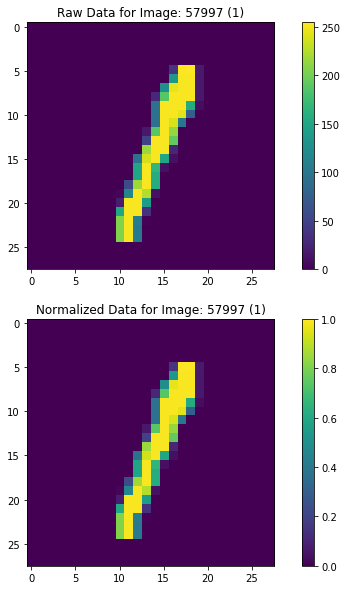

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
img_index = np.random.randint(0,X_train.shape[0]-1)

# Raw data
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.imshow(X_train[img_index])
plt.title('Raw Data for Image: ' + str(img_index) + ' (' + str(Y_train[img_index]) + ')') #str(Y_train[img_index])')')
plt.colorbar()

# Processed data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
plt.subplot(212)
plt.title('Normalized Data for Image: ' + str(img_index) + ' (' + str(Y_train[img_index]) + ')') #str(Y_train[img_index])')')
plt.imshow(X_train[img_index])
plt.colorbar()

# Reshaping data
image_size = X_train.shape[1]
X_train = np.reshape(X_train, [-1, image_size, image_size, 1])
X_test  = np.reshape(X_test,  [-1, image_size, image_size, 1])

In [3]:
def encode(data):
    print('Size of data before encoding: %s' %str(data.shape))
    encoded = tf.keras.utils.to_categorical(data)
    print('Size of data after encoding %s:'%str(encoded.shape))
    return encoded

Y_encode_train = encode(Y_train)
Y_encode_test = encode(Y_test)

Size of data before encoding: (60000,)
Size of data after encoding (60000, 10):
Size of data before encoding: (10000,)
Size of data after encoding (10000, 10):


# Control variables


In [4]:
# n_latent: The number of latent variables to map to in the encoder network. 
# original_dim: Length of vector for image data
# intermediate_dim: Length of hidden layer
# n_latent = 2
input_shape = (image_size, image_size, 1)
epochs = 10
batch = 128
filters = 16
kernel_size = 3

# CLASSIFIER

In [5]:
inputs = Input(shape=input_shape, name='input')
x = inputs
for i in range(2):
    filters *= 2
    x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              activation='relu',
              strides=2,
              padding='same')(x)

x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)

classifier = Model(inputs, outputs, name='classifier')
plot_model(classifier, to_file='mnis_cnn_classifier.png', show_shapes=True)

# Compile Model



In [6]:
classifier.compile(optimizer='adam',loss='binary_crossentropy')
classifier.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
_________________________________________________________________


# Training

In [7]:
classifier.fit(X_train,
               Y_encode_train,
            epochs=epochs,
            batch_size=batch,
            validation_data=(X_test, Y_encode_test))

classifier.save_weights('mnist_cnn_classifier.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0546 - val_loss: 0.0198
Epoch 2/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0182 - val_loss: 0.0131
Epoch 3/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0128 - val_loss: 0.0125
Epoch 4/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0104 - val_loss: 0.0096
Epoch 5/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0089 - val_loss: 0.0091
Epoch 6/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0078 - val_loss: 0.0091
Epoch 7/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0067 - val_loss: 0.0100
Epoch 8/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0059 - val_loss: 0.0088
Epoch 9/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0051 - val_loss: 0.0087
Epoc

# PREDICT

Here we try to predict the values in an image

3
3


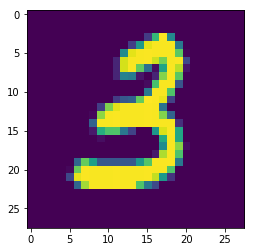

In [10]:
img_index = np.random.randint(0,X_train.shape[0]-1)
random_image = X_train[img_index]
random_image = np.reshape(random_image, (1, 28, 28, 1))
pred_val = classifier.predict(random_image)
print(Y_train[img_index])


print(np.argmax(pred_val))
random_image = np.reshape(random_image, (28, 28))

plt.imshow(random_image)
